In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [40]:
current_year = 2024

In [41]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")
data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


In [42]:
df = data.drop("id", axis=1)
dt = test.drop("id", axis=1)

In [43]:
df["age"] = current_year - df["model_year"]
df.drop("model_year", axis=1, inplace=True)
dt["age"] = current_year - dt["model_year"]
dt.drop("model_year", axis=1, inplace=True)

In [44]:
df

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age
0,Ford,F-150 Lariat,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,6
1,BMW,335 i,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,17
2,Jaguar,XF Luxury,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,15
3,BMW,X7 xDrive40i,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,2
4,Pontiac,Firebird Base,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,23
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,BMW,X6 xDrive50i,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000,7
54269,Audi,A4 2.0T Premium,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500,9
54270,Porsche,Cayenne S,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950,11
54271,Porsche,911 Carrera 4 GTS,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965,1


In [45]:
dt

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age
0,Mercedes-Benz,E-Class E 350,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,10
1,Lexus,RX 350 Base,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,9
2,Mercedes-Benz,C-Class C 300,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,9
3,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,6
4,BMW,X6 xDrive40i,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,4
...,...,...,...,...,...,...,...,...,...,...,...
36178,GMC,Yukon Denali,4500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gray,Black,None reported,Yes,5
36179,Chevrolet,Silverado 1500 Z71 Extended Cab,185000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes,20
36180,Toyota,Corolla LE,116000,Gasoline,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Beige,Gray,None reported,Yes,13
36181,Lincoln,Navigator Reserve,39000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Orange,None reported,Yes,5


<Axes: ylabel='price'>

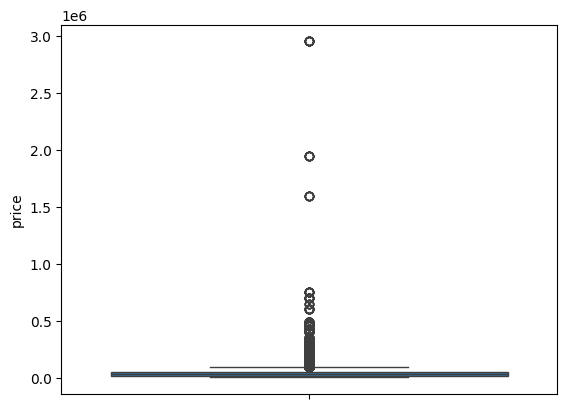

In [46]:
sns.boxplot(data.price)

In [47]:
sorted(data.price, reverse=True)

[2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 2954083,
 1950995,
 1950995,
 1950995,
 1950995,
 1950995,
 1950995,
 1950995,
 1950995,
 1950995,
 1599000,
 1599000,
 1599000,
 1599000,
 1599000,
 1599000,
 1599000,
 1599000,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 749950,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 695000,
 649999,
 649999,
 649999,
 649999,
 649999,
 599995,
 599995,
 599995,
 599995,
 599995,
 599995,
 599995,
 599995,
 599000,
 599000,
 599000,
 599000,
 599000,
 599000,
 599000,
 599000,
 599000,
 599000,
 599000,
 599000,
 491836,
 491836,
 491836,
 491836,
 491836,
 491836,
 491836,
 491836,
 491836,
 491836,
 489995,
 489995,
 489995,
 489995,
 489995,
 489995,
 489995,
 489995,
 4899

In [48]:
df = df[~(df.price >= 1000000) & (df.price <= 3000000)]
len(df)

54241

In [49]:
df.describe()

,milage,price,age
count,54241.000000,54241.000000,54241.000000
mean,72754.033554,37865.090522,8.906528
std,50453.547899,44609.462859,5.588158
min,100.000000,2000.000000,0.000000
25%,32268.000000,15500.000000,5.000000
50%,66107.000000,28000.000000,8.000000
75%,102000.000000,45000.000000,12.000000
max,405000.000000,749950.000000,50.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54241 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54241 non-null  object
 1   model         54241 non-null  object
 2   milage        54241 non-null  int64 
 3   fuel_type     54241 non-null  object
 4   engine        54241 non-null  object
 5   transmission  54241 non-null  object
 6   ext_col       54241 non-null  object
 7   int_col       54241 non-null  object
 8   accident      54241 non-null  object
 9   clean_title   54241 non-null  object
 10  price         54241 non-null  int64 
 11  age           54241 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.4+ MB


In [51]:
df.isnull().sum()

brand           0
model           0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
age             0
dtype: int64

In [52]:
for i in df.columns:
        print(f"{i}: {len(df[i].unique())}")

brand: 52
model: 1826
milage: 3210
fuel_type: 7
engine: 1060
transmission: 46
ext_col: 260
int_col: 124
accident: 2
clean_title: 1
price: 1478
age: 34


In [53]:
df.brand.unique()

array(['Ford', 'BMW', 'Jaguar', 'Pontiac', 'Acura', 'Audi', 'GMC',
       'Maserati', 'Chevrolet', 'Porsche', 'Mercedes-Benz', 'Tesla',
       'Lexus', 'Kia', 'Lincoln', 'Dodge', 'Volkswagen', 'Land',
       'Cadillac', 'Mazda', 'RAM', 'Subaru', 'Hyundai', 'MINI', 'Jeep',
       'Honda', 'Hummer', 'Nissan', 'Toyota', 'Volvo', 'Genesis',
       'Mitsubishi', 'Buick', 'INFINITI', 'McLaren', 'Scion',
       'Lamborghini', 'Bentley', 'Suzuki', 'Ferrari', 'Alfa',
       'Rolls-Royce', 'Chrysler', 'Aston', 'Rivian', 'Lotus', 'Saturn',
       'Lucid', 'Mercury', 'Maybach', 'FIAT', 'Plymouth'], dtype=object)

In [54]:
labeler = LabelEncoder()

for i in df.columns:
        df[i] = labeler.fit_transform(df[i])

for i in dt.columns:
        dt[i] = labeler.fit_transform(dt[i])

C:\Users\91909\AppData\Local\Temp\ipykernel_32056\2312118223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = labeler.fit_transform(df[i])
C:\Users\91909\AppData\Local\Temp\ipykernel_32056\2312118223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = labeler.fit_transform(df[i])
C:\Users\91909\AppData\Local\Temp\ipykernel_32056\2312118223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [55]:
df

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age
0,13,644,2068,2,719,2,26,57,1,0,157,6
1,4,49,2185,2,534,18,17,9,1,0,100,17
2,20,1770,2374,2,541,14,181,6,1,0,243,15
3,4,1747,145,3,646,43,100,24,1,0,1090,2
4,39,693,2630,2,219,34,249,9,1,0,89,23
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,4,1744,1060,2,856,27,249,24,1,0,538,7
54269,3,165,2422,1,266,14,17,9,0,0,62,9
54270,40,421,1370,2,817,43,249,9,0,0,317,11
54271,40,142,89,2,762,29,12,24,1,0,1410,1


In [56]:
dt

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age
0,34,528,1887,2,544,33,220,8,1,0,10
1,26,1246,2570,2,410,26,187,10,1,0,9
2,34,317,1486,2,311,20,26,107,1,0,9
3,25,1318,979,2,911,42,220,107,0,0,6
4,4,1710,2164,2,633,26,220,10,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
36178,15,1763,213,2,807,2,88,10,1,0,5
36179,9,1481,2856,2,473,7,163,53,0,0,20
36180,49,480,2460,2,30,11,12,53,1,0,13
36181,27,1082,1209,2,843,2,17,82,1,0,5


In [57]:
df.corr()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age
brand,1.000000,-0.096269,0.037405,0.040905,-0.135279,0.030515,0.005210,0.000309,-0.012292,NaN,-0.035569,0.068264
model,-0.096269,1.000000,0.050008,0.013782,-0.036697,0.003303,-0.009937,0.015125,-0.024687,NaN,-0.036283,0.000117
milage,0.037405,0.050008,1.000000,-0.084062,-0.358869,-0.026214,0.020853,-0.019667,-0.298873,NaN,-0.701022,0.625932
fuel_type,0.040905,0.013782,-0.084062,1.000000,0.053835,0.094498,-0.017439,0.015198,0.031836,NaN,0.004248,0.041947
engine,-0.135279,-0.036697,-0.358869,0.053835,1.000000,-0.008228,-0.037945,-0.015375,0.169899,NaN,0.521212,-0.302414
transmission,0.030515,0.003303,-0.026214,0.094498,-0.008228,1.000000,0.011824,-0.000170,-0.019544,NaN,0.011677,-0.046570
ext_col,0.005210,-0.009937,0.020853,-0.017439,-0.037945,0.011824,1.000000,0.071981,-0.008841,NaN,-0.038464,0.022977
int_col,0.000309,0.015125,-0.019667,0.015198,-0.015375,-0.000170,0.071981,1.000000,-0.019500,NaN,0.016827,0.018000
accident,-0.012292,-0.024687,-0.298873,0.031836,0.169899,-0.019544,-0.008841,-0.019500,1.000000,NaN,0.287789,-0.216596
clean_title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


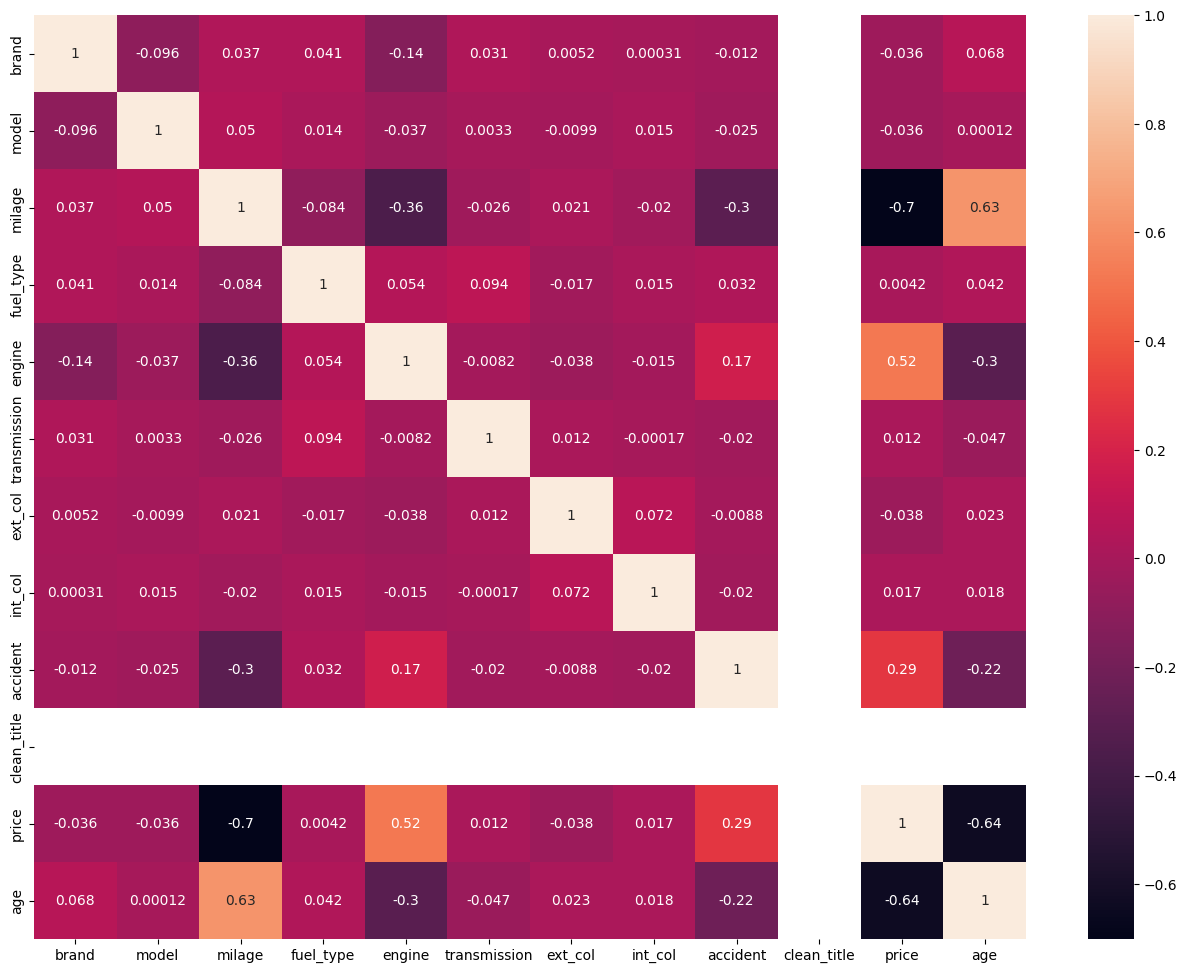

In [58]:
plt.figure(figsize=(16, 12))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

In [59]:
#dx = df[['age', 'milage', 'engine', 'accident', 'ext_col', 'brand', 'model']]
dx = df.drop("price", axis=1)
dx

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age
0,13,644,2068,2,719,2,26,57,1,0,6
1,4,49,2185,2,534,18,17,9,1,0,17
2,20,1770,2374,2,541,14,181,6,1,0,15
3,4,1747,145,3,646,43,100,24,1,0,2
4,39,693,2630,2,219,34,249,9,1,0,23
...,...,...,...,...,...,...,...,...,...,...,...
54268,4,1744,1060,2,856,27,249,24,1,0,7
54269,3,165,2422,1,266,14,17,9,0,0,9
54270,40,421,1370,2,817,43,249,9,0,0,11
54271,40,142,89,2,762,29,12,24,1,0,1


In [60]:
dy = df.price
dy

0         157
1         100
2         243
3        1090
4          89
         ... 
54268     538
54269      62
54270     317
54271    1410
54272     732
Name: price, Length: 54241, dtype: int64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(dx, dy, test_size=0.2, random_state=42)

In [62]:
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred4 = xg.predict(x_test)

In [64]:
score4 = r2_score(y_test, y_pred4)

In [65]:
score4

0.6865631841492661

In [66]:
prediction = xg.predict(dt)

In [67]:
sub

,id,price
0,54273,39218.443
1,54274,39218.443
2,54275,39218.443
3,54276,39218.443
4,54277,39218.443
...,...,...
36178,90451,39218.443
36179,90452,39218.443
36180,90453,39218.443
36181,90454,39218.443


In [68]:
sub.drop("price", axis=1)
sub

,id,price
0,54273,39218.443
1,54274,39218.443
2,54275,39218.443
3,54276,39218.443
4,54277,39218.443
...,...,...
36178,90451,39218.443
36179,90452,39218.443
36180,90453,39218.443
36181,90454,39218.443


In [69]:
sub.to_csv("Submit1", index=False)